# Drew Warren
# Deep learning from scratch: homework 2

### General instructions

Complete the exericse listed below in this Jupyter notebook - leaving all of your code in Python cells in the notebook itself.  Feel free to add any necessary cells.  

### When submitting this homework:

**Make sure you have put your name at the top of each file**
    
**Make sure all output is present in your notebook prior to submission**

**If possible please do not zip your files when uploading to canvas**

#### <span style="color:#a50e3e;">Exercise 1. </span>  Perform mulclass classification on the MNIST dataset

Use the *multiclass softmax* cost function detailed in [Section 10.2 of the course notes](https://jermwatt.github.io/mlrefined/blog_posts/10_Linear_multiclass_classification/10_2_Multiclass_classification.html) to perform multiclass classification on a preprocessed subset of $10,000$ images from the [MNIST handwritten digit dataset](https://en.wikipedia.org/wiki/MNIST_database), which is located in the same folder as this notebook and called

``mnist_contrast_normalized.csv``

Make sure you

- Set the regularization parameter `lam` from the multiclass softmax to zero for your experiments


- Use the gradient descent `Python` code block shown in [Section 6.4 of the course notes](https://jermwatt.github.io/mlrefined/blog_posts/6_First_order_methods/6_4_Gradient_descent.html). 


- You standard normalize each feature of the input to greatly speed up gradient descent - this simply involves subtracting off the mean and dividing off the standard deviation of each feature as discussed in Sections 8.4, 9.4, and 10.3 of the course notes


- Write a custom two-panel function in `Python` to show the cost function value per iteration of gradient descent in one panel, and the corresponding number of misclassifications per iteration in the other.   You can find an efficient implementation of the multiclass misclassification counting function in Section 10.2 of the course notes 


- Use a steplength of the form $10^{\gamma}$ where $\gamma$ is an integer - try to find the largest steplength of this form that produces reasonable convergence.  Having normalized your input you might be surprised how large of a steplength value you can use in practice!  One way to find a working steplength is to try various values taking just a few steps (e.g., 5 or 10) of gradient descent and plotting the cost function / misclassification history plots over such short runs to visually confirm that the trend is decreasing - picking the largest steplength value that does indeed produce an overall decreasing trend, making a new run with this steplength value for a larger number of steps.


- Using at most 300 iterations of gradient descent you should be able to learn parameters that provide less that 300 misclassifications (around 97% accuracy).  

Below are a few `Python` including one that loads in the bsaic `autograd` and `matplotlib` libraries, and one that loads in the dataset, and a suggested initialization for gradient descnt.

Import necessary libraries.

In [1]:
# import necessary library
import autograd.numpy as np   
from autograd import value_and_grad 
import matplotlib.pyplot as plt

# # this is needed to compensate for %matplotlib notebook's tendancy to blow up images when plotted inline
%matplotlib notebook
from matplotlib import rcParams
rcParams['figure.autolayout'] = True

Import data.

In [3]:
data = np.loadtxt('mnist_test_contrast_normalized.csv',delimiter = ',')
x = data[:,:-1].T
y = data[:,-1:]

In [23]:
# Relevant function declarations

def gradient_descent(g,alpha_choice,max_its,w):
    gradient = value_and_grad(g)
    weight_history = []
    cost_history = []
    alpha = 0
    for k in range(1,max_its+1):
        if alpha_choice == 'diminishing':
            alpha = 1/float(k)
        else:
            alpha = alpha_choice
            
        cost_eval,grad_eval = gradient(w)
        weight_history.append(w)
        cost_history.append(cost_eval)
        w = w - alpha*grad_eval
        
    weight_history.append(w)
    cost_history.append(g(w))  
    return weight_history,cost_history

def model(x,w):
    o = np.ones((1,np.shape(x)[1]))
    x = np.vstack((o,x))
    a = np.dot(x.T,w)
    return a

lam = 0 # regularization parameter
def multiclass_softmax(w):
    all_evals = model(x_n,w) # use the normalized data
    
    a = np.log(np.sum(np.exp(all_evals),axis = 1))
    b = all_evals[np.arange(len(y)),y.astype(int).flatten()]
    cost = np.sum(a - b)
    
    cost += lam*np.linalg.norm(w[1:,:],'fro')**2
    return cost/float(len(y))

def standard_normalizer(x):
    x_means = np.mean(x,axis = 1)[:,np.newaxis]
    x_stds = np.std(x,axis = 1)[:,np.newaxis]
    normalizer = lambda data: (data - x_means)/x_stds
    return normalizer

def multiclass_counting_cost(w):
    all_evals = model(x_n,w)
    y_predict = (np.argmax(all_evals,axis = 1))[:,np.newaxis]
    count = np.sum(np.abs(np.sign(y - y_predict)))
    return count

You can use an initialization for your runs of gradient descent of the following form.

In [41]:
# standard normalize the data
normalizer = standard_normalizer(x)
x_n = normalizer(x)

g = multiclass_softmax
w = 0.1*np.random.randn(x.shape[0] + 1,10)
max_its = 1000
alpha_choice = 10**(0)
weight_history, cost_history = gradient_descent(g, alpha_choice, max_its, w)
count_history = [multiclass_counting_cost(v) for v in weight_history]
count_history[-1]

39.0

<IPython.core.display.Javascript object>


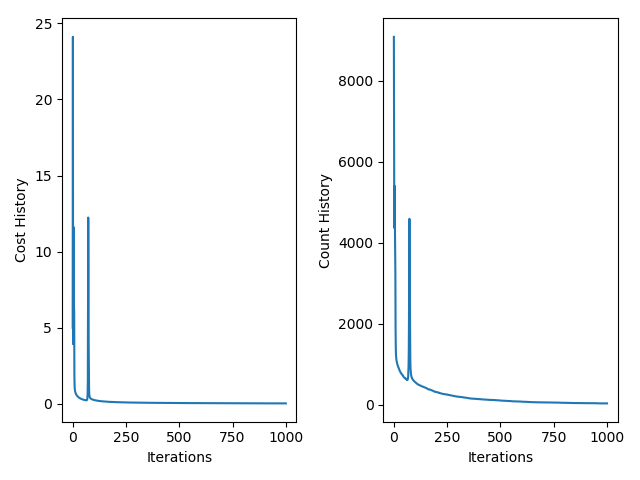

In [42]:
# Plotting
fig = plt.figure()
plt.subplot(121)
plt.plot(range(max_its+1), cost_history)
plt.ylabel('Cost History')
plt.xlabel('Iterations')
plt.subplot(122)
plt.plot(range(max_its+1),count_history)
plt.ylabel('Count History')
plt.xlabel('Iterations')
plt.show()